<a href="https://colab.research.google.com/github/bigdataben404/S10732025/blob/master/1217_DM(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
system("ls",TRUE)

[1] "sample_data"

In [2]:
install.packages("ggplot2")
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(SportsAnalytics)
library(ggplot2)

In [4]:
NBA1516<-fetch_NBAPlayerStatistics("15-16")

`geom_smooth()` using formula 'y ~ x'



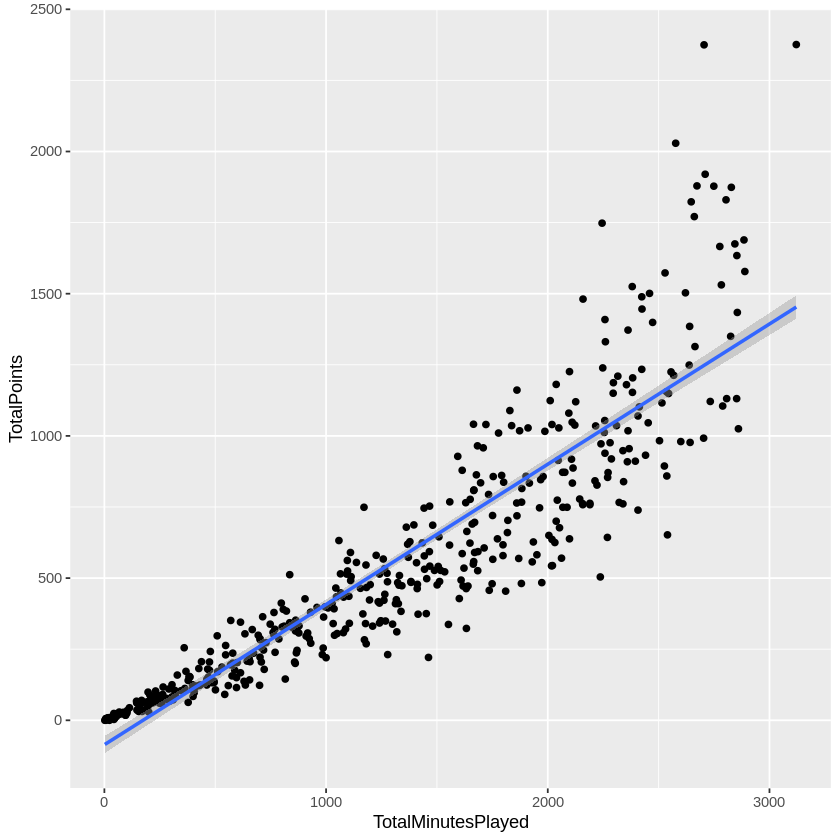

In [5]:
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method="glm")

In [6]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1516)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1516)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -85.9071              0.4931  


In [7]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,
data=NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -1.799e+01           -2.347e-04            1.256e+00  

Degrees of Freedom: 475 Total (i.e. Null);  473 Residual
Null Deviance:	    99360000 
Residual Deviance: 2160000 	AIC: 5367

In [8]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
data =NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          22.852223            -0.006537             1.275721  
         PositionPF           PositionPG           PositionSF  
         -39.416327           -65.034646           -38.522299  
         PositionSG  
         -52.175144  

Degrees of Freedom: 474 Total (i.e. Null);  468 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    99080000 
Residual Deviance: 1975000 	AIC: 5322

In [9]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [10]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [11]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata, family = "binomial")

sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [12]:
OneVar<-glm(TotalPoints~TotalMinutesPlayed,data =NBA1516)
TwoVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,

data =NBA1516)

ThreeVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,

data =NBA1516)

c(OneVar$aic,TwoVar$aic,ThreeVar$aic)

[1] 6338.913 5366.763 5321.972

In [13]:
sum2<-summary(TwoVar)
sum2$coefficients


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.798855e+01,5.659758251,-3.17832538,1.578333e-03
TotalMinutesPlayed,-2.347183e-04,0.009474631,-0.02477334,9.802462e-01
FieldGoalsAttempted,1.255794e+00,0.022239494,56.46682752,2.474028e-212


In [14]:
sum3<-summary(ThreeVar)
sum3$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),22.852222668,9.014714391,2.5349913,1.156964e-02
TotalMinutesPlayed,-0.006536874,0.009199968,-0.7105322,4.777281e-01
FieldGoalsAttempted,1.275721212,0.021647176,58.9324535,1.144607e-218
PositionPF,-39.416326742,9.936541704,-3.9668053,8.425605e-05
PositionPG,-65.034646215,10.269250388,-6.3329497,5.648565e-10
PositionSF,-38.522298887,10.488170409,-3.6729284,2.674727e-04
PositionSG,-52.175143670,9.985331185,-5.2251791,2.625062e-07


In [15]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
library(rpart)
DT<-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1516)
DT

n=475 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 475 364 PF (0.15 0.23 0.21 0.18 0.23)  
    2) ThreesMade< 2.5 132  74 C (0.44 0.35 0.098 0.053 0.061)  
      4) Blocks>=4.5 89  37 C (0.58 0.38 0.011 0.011 0.011) *
      5) Blocks< 4.5 43  31 PF (0.14 0.28 0.28 0.14 0.16)  
       10) Steals< 2.5 29  19 PF (0.17 0.34 0.14 0.21 0.14) *
       11) Steals>=2.5 14   6 PG (0.071 0.14 0.57 0 0.21) *
    3) ThreesMade>=2.5 343 242 SG (0.035 0.19 0.25 0.23 0.29)  
      6) Assists>=170.5 96  39 PG (0.031 0.052 0.59 0.15 0.18) *
      7) Assists< 170.5 247 163 SG (0.036 0.24 0.12 0.26 0.34)  
       14) Blocks>=20.5 80  42 PF (0.062 0.48 0 0.26 0.2)  
         28) Steals< 59.5 58  21 PF (0.069 0.64 0 0.14 0.16) *
         29) Steals>=59.5 22   9 SF (0.045 0.045 0 0.59 0.32) *
       15) Blocks< 20.5 167  99 SG (0.024 0.13 0.17 0.26 0.41)  
         30) Assists< 81.5 110  68 SG (0.027 0.18 0.091 0.32 0.38)  
        

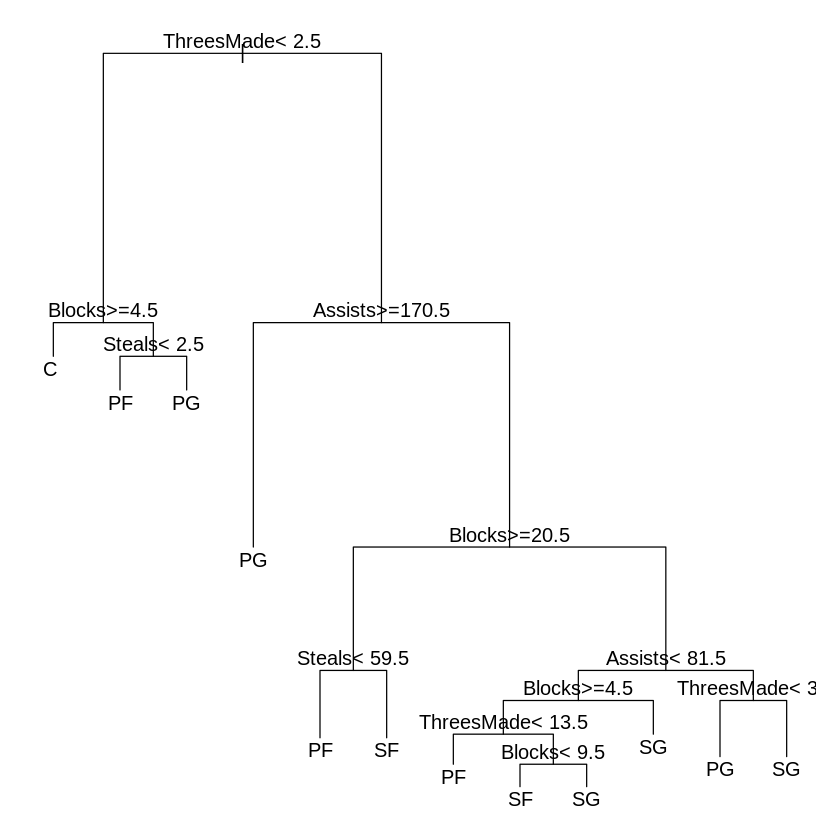

In [17]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

In [18]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
library(rpart.plot)


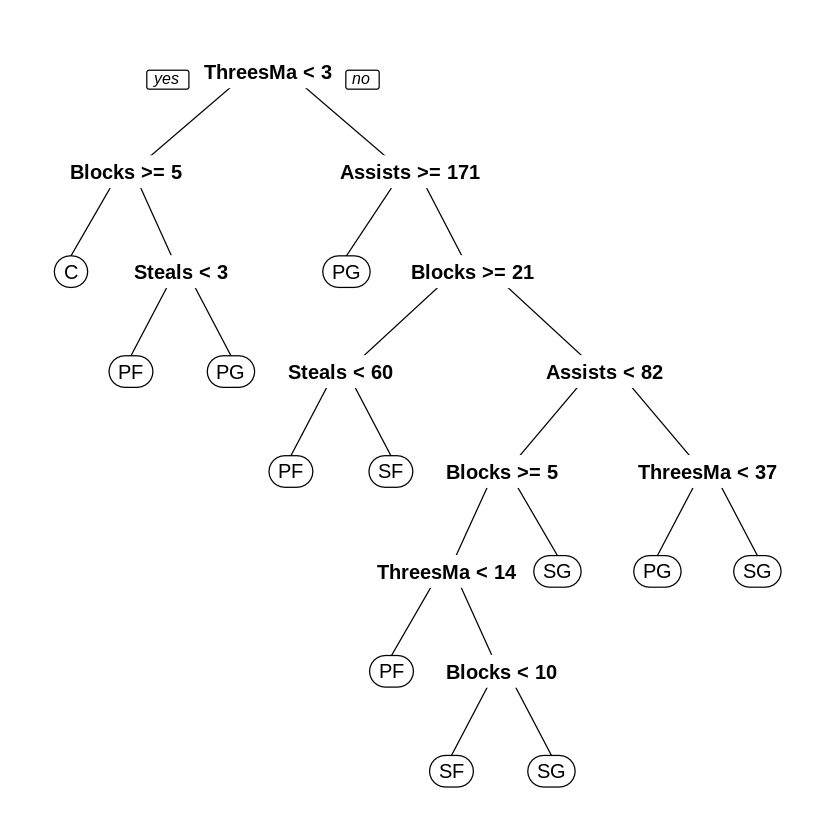

In [20]:
prp(DT)

In [21]:
mtcars.mxs<-as.matrix(mtcars)
d<-dist(mtcars.mxs) #預設為euclidean
head(d)

[1]   0.6153251  54.9086059  98.1125212 210.3374396  65.4717710 241.4076490

In [22]:
d<-dist(mtcars.mxs, method="manhattan") #計算manhattan距離
head(d)

[1]   0.815  79.300 108.795 275.430  84.640 347.960

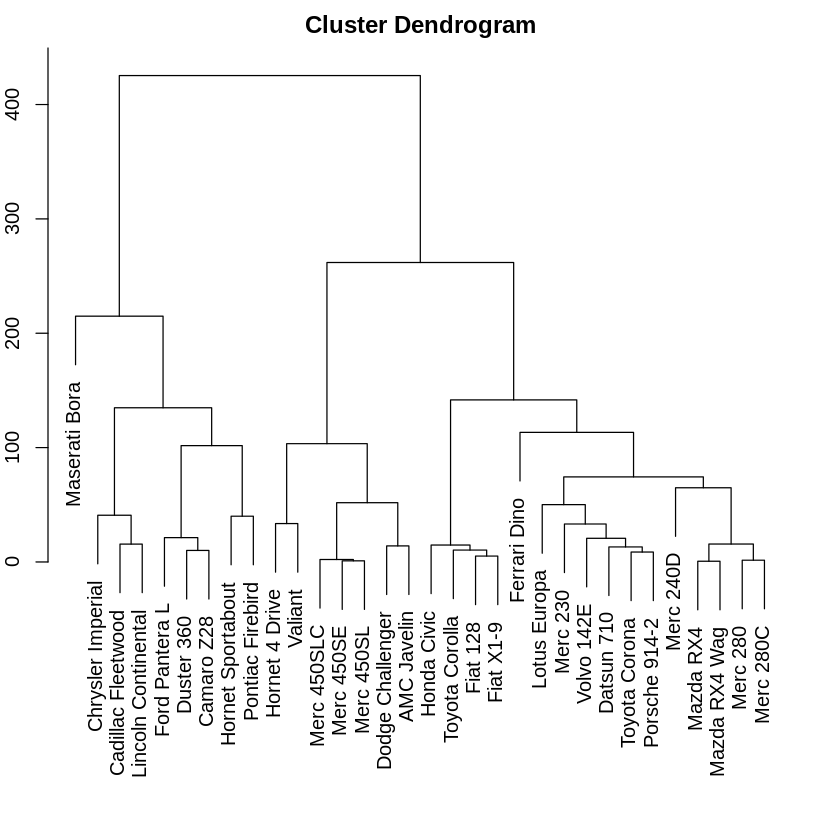

In [23]:
par(mar=rep(2,4),mfrow=c(1,1))
hc<-hclust(dist(mtcars.mxs)) #可用method參數設定聚合方法,預設為complete
plot(hc)

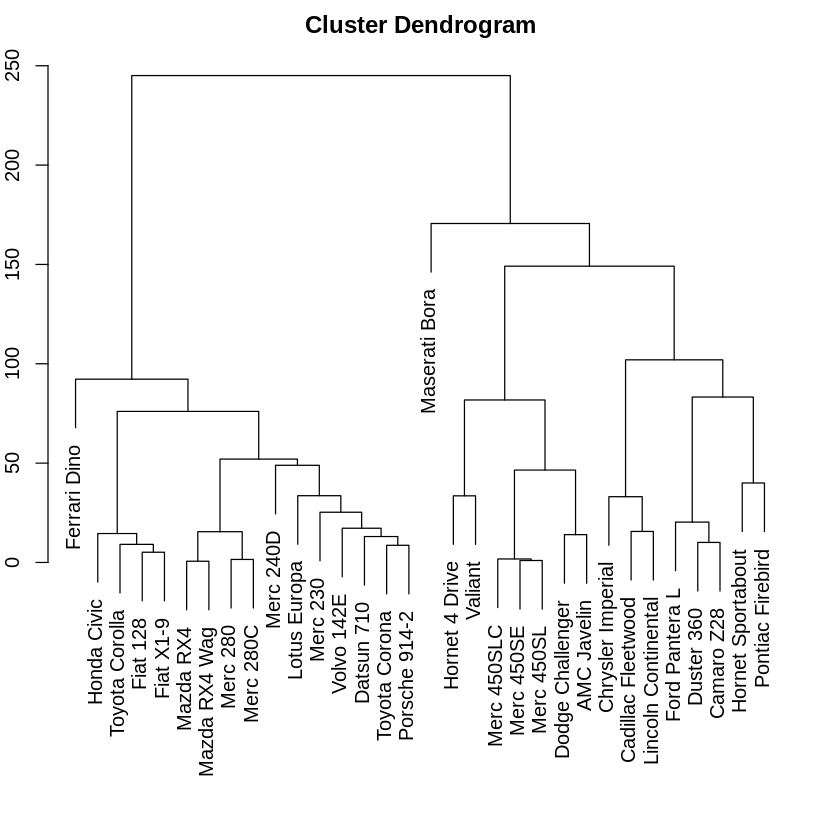

In [24]:
par(mar=rep(2,4),mfrow=c(1,1))
hc<-hclust(dist(mtcars.mxs),method="average") #聚合方法為計算平均距離
plot(hc)

In [25]:
clusterCut <- cutree(hc, k=3)
sort(clusterCut)

Mazda RX4       Mazda RX4 Wag          Datsun 710           Merc 240D 
                  1                   1                   1                   1 
           Merc 230            Merc 280           Merc 280C            Fiat 128 
                  1                   1                   1                   1 
        Honda Civic      Toyota Corolla       Toyota Corona           Fiat X1-9 
                  1                   1                   1                   1 
      Porsche 914-2        Lotus Europa        Ferrari Dino          Volvo 142E 
                  1                   1                   1                   1 
     Hornet 4 Drive   Hornet Sportabout             Valiant          Duster 360 
                  2                   2                   2                   2 
         Merc 450SE          Merc 450SL         Merc 450SLC  Cadillac Fleetwood 
                  2                   2                   2                   2 
Lincoln Continental   Chrysler Imperial    Dodge Challenger         AMC Javelin 
                  2                   2                   2                   2 
         Camaro Z28    Pontiac Firebird      Ford Pantera L       Maserati Bora 
                  2                   2                   2                   3

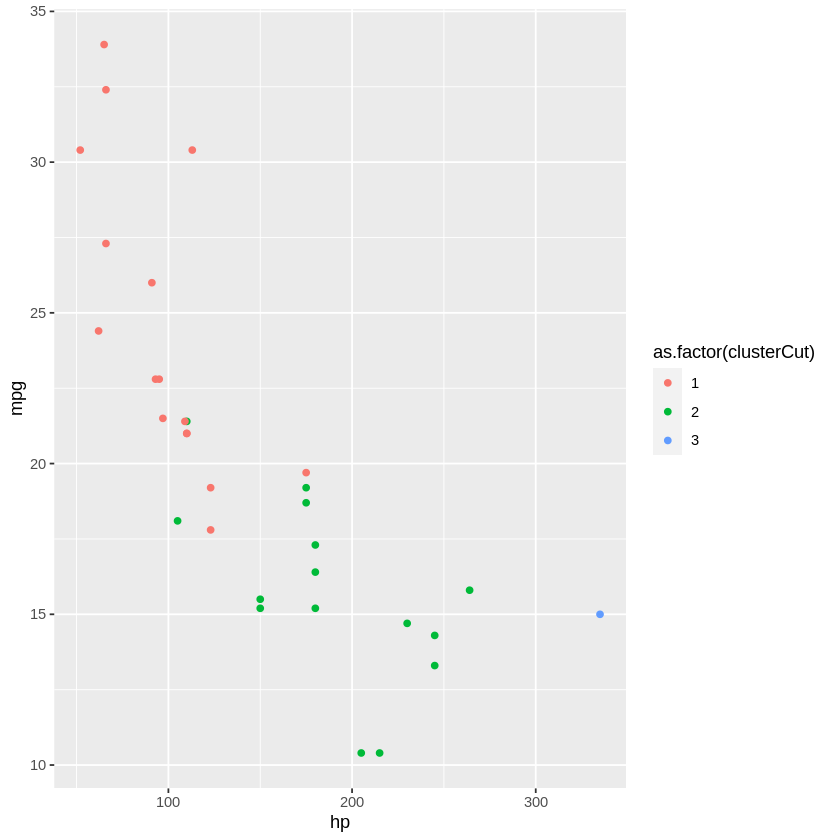

In [26]:
ggplot()+geom_point(data=mtcars,

aes(x=hp,y=mpg,color=as.factor(clusterCut)))

In [27]:
clusterCut <- cutree(hc,h =4) #切在高度=4的地方(距離=4)
sort(clusterCut)

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  1                   1                   2                   3 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  4                   5                   6                   7 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  8                   9                   9                  10 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                 10                  10                  11                  12 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                 13                  14                  15                  16 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
                 17                  18                  19                  20 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
                 21                  22                  23                  24 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
                 25                  26                  27                  28

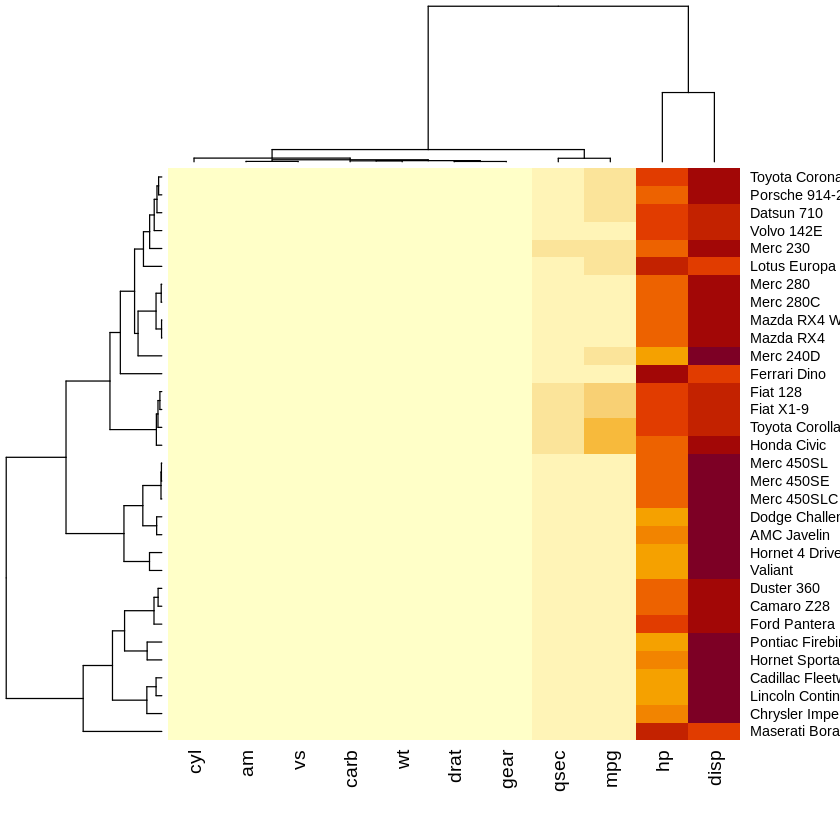

In [28]:
par(mar=rep(0.2,4),mfrow=c(1,1))
heatmap(mtcars.mxs)

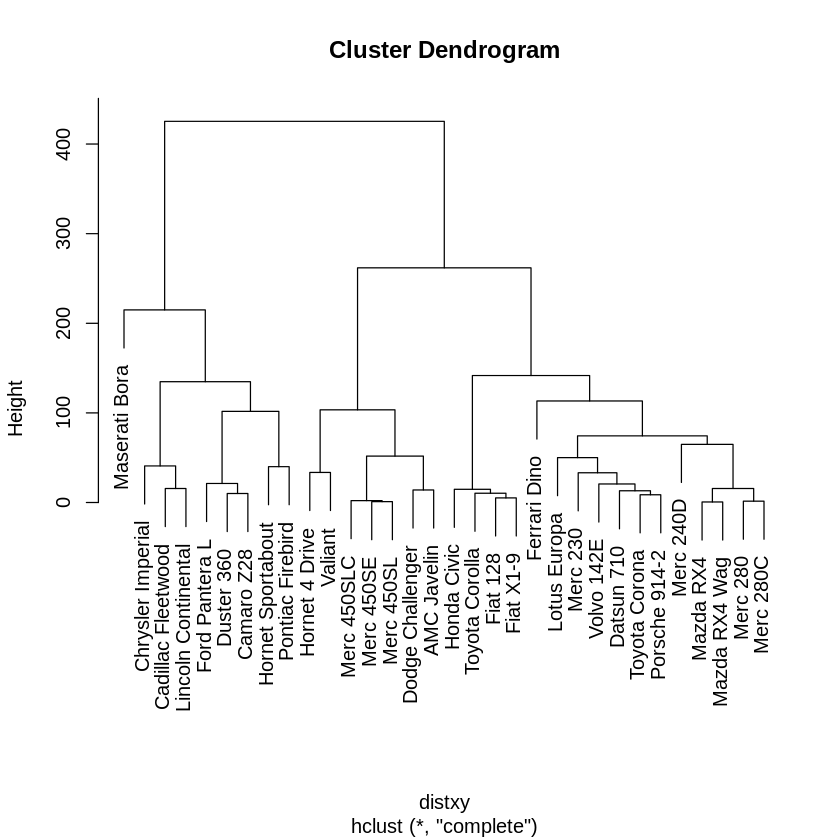

In [29]:
distxy <- dist(mtcars.mxs)
hClustering <- hclust(distxy)
plot(hClustering)

ERROR: ignored

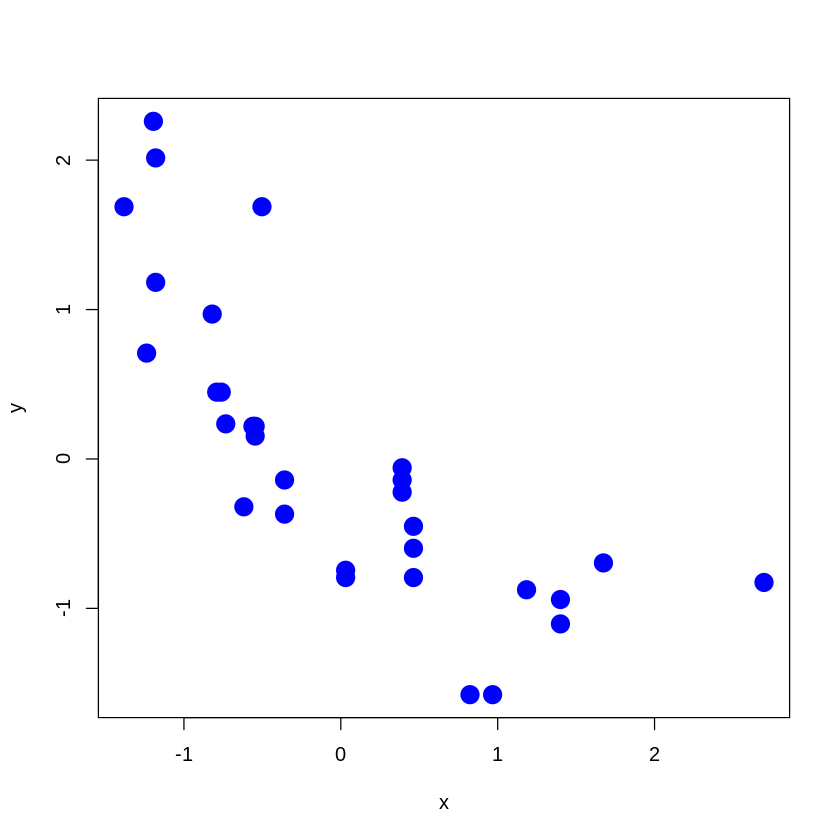

In [30]:
x<-scale(mtcars$hp[-1]);y<-scale(mtcars$mpg[-1])
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=labelCar)

In [31]:
dataFrame <- data.frame(x,y)
kmeansObj <- kmeans(dataFrame,centers=3)
names(kmeansObj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [32]:
kmeansObj$cluster

[1] 1 3 1 1 1 2 3 3 1 1 1 1 1 2 2 2 3 3 3 1 1 1 2 1 3 3 3 2 1 2 1

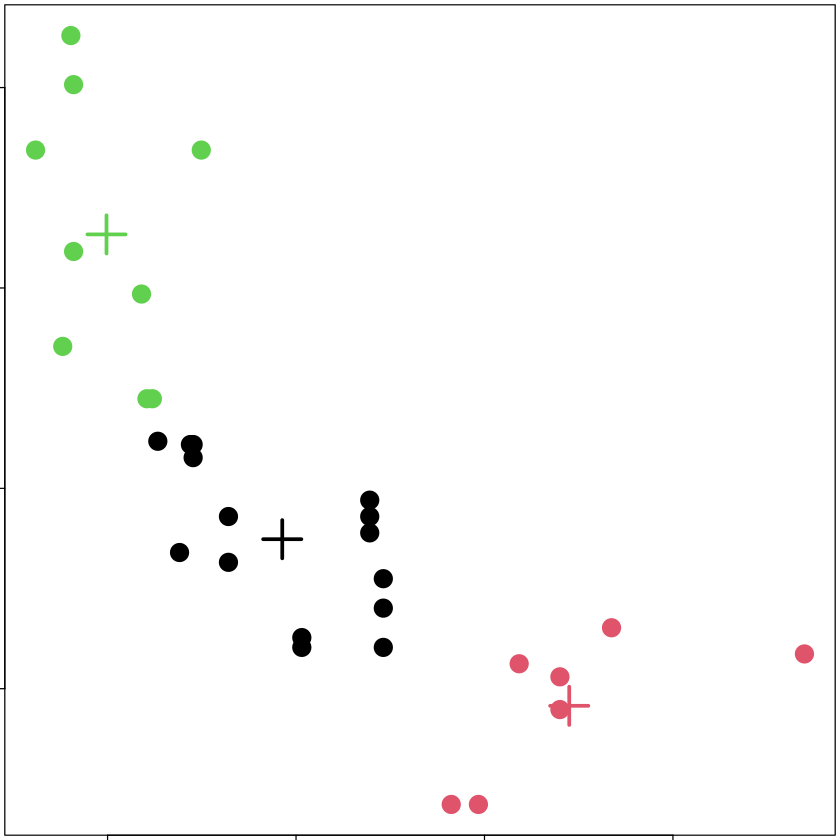

In [33]:
par(mar=rep(0.2,4))
plot(x,y,col=kmeansObj$cluster,pch=19,cex=2)
points(kmeansObj$centers,col=1:3,pch=3,cex=3,lwd=3)


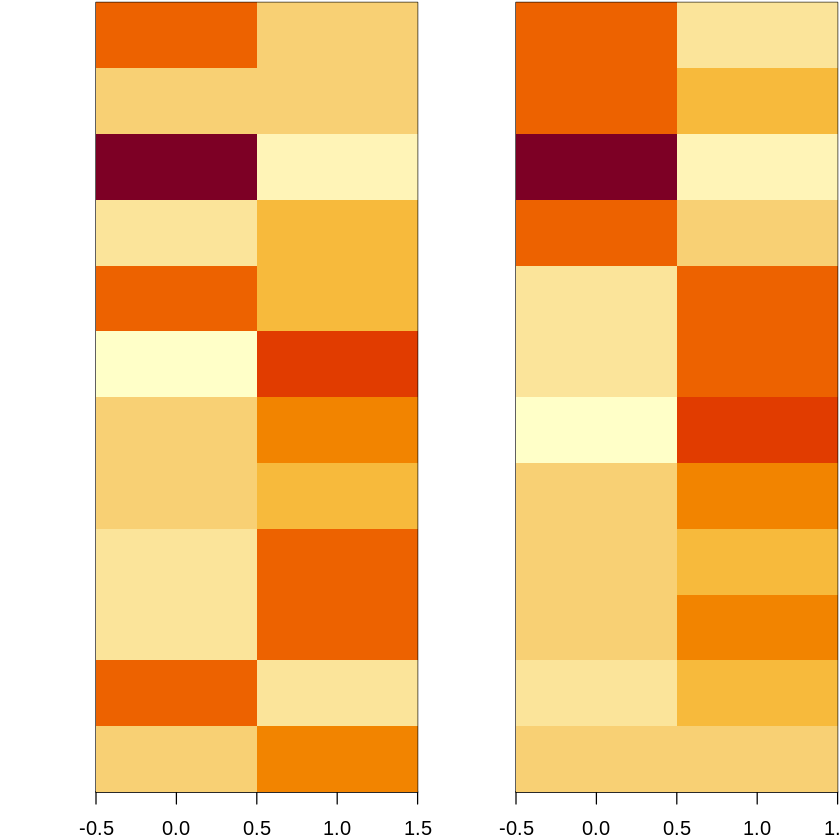

In [34]:
set.seed(1234)
dataMatrix <- as.matrix(dataFrame)[sample(1:12),]
kmeansObj <- kmeans(dataMatrix,centers=3)
par(mfrow=c(1,2), mar = c(2, 4, 0.1, 0.1))
image(t(dataMatrix)[,nrow(dataMatrix):1],yaxt="n")
image(t(dataMatrix)[,order(kmeansObj$cluster)],yaxt="n")

In [35]:
# Load the libraries
if (!require('arules')){
  install.packages("arules");library(arules) #for Apriori演算法
}
if (!require('datasets')){
install.packages("datasets");
library(datasets) #for Groceries data
}
data(Groceries) # Load the data set
Groceries@data@Dim #169 種商品,9835筆交易資料

Loading required package: arules

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




[1]  169 9835

In [37]:
# Get the rules
rules <- apriori(Groceries, # data= Groceries

parameter = list(supp = 0.001, conf = 0.8), #參數最低限度
control = list(verbose=F)) #不要顯示output

options(digits=2) # Only 2 digits
inspect(rules[1:5]) # Show the top 5 rules

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [38]:
rules<-sort(rules, by="confidence", decreasing=TRUE) #按照confidence排序
inspect(rules[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [39]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
appearance = list(default="lhs",rhs="whole milk"), #設定右邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesR[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [40]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
appearance = list(default="rhs",lhs="whole milk"), #設定左邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesL[1:5]) # Show the top 5 rules

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [41]:
if (!require('arulesViz')){
install.packages("arulesViz");
library(arulesViz)
}


Loading required package: arulesViz

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arulesViz’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘zoo’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘hexbin’, ‘data.table’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘plotly’, ‘visNetwork’


Warning message in install.packages("arulesViz"):
“installation of package ‘igraph’ had non-zero exit status”
Warning message in install.packages("arulesViz"):
“installation of package ‘arulesViz’ had non-zero exit status”


ERROR: ignored

In [ ]:
#Mac->https://planspace.org/2013/01/17/fix-r-tcltk-dependency-problem-on-mac/
plot(rules,method="graph",interactive=TRUE,shading=NA)

In [ ]:
install.packages('prophet')

In [ ]:
library(prophet)
library(dplyr)
df <- read.csv('https://raw.githubusercontent.com/facebookincubator/prophet/master/
mutate(y = log(y))
m <- prophet(df)
future <- make_future_dataframe(m, periods = 365)
tail(future)
forecast <- predict(m, future)
tail(forecast[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])
plot(m, forecast)
prophet_plot_components(m, forecast)

ERROR: ignored

In [ ]:
devtools::install_github("rstudio/tensorflow")

In [ ]:
library(tensorflow)
sess = tf$Session()
hello <- tf$constant('Hello, TensorFlow!')
sess$run(hello)

In [ ]:
install.packages("drat", repos="https://cran.rstudio.com")
drat:::addRepo("dmlc")
install.packages("mxnet")

In [ ]:
if (!require('SportsAnalytics')){
install.packages("SportsAnalytics")
library(SportsAnalytics)
}
#擷取2015-2016年球季球員資料
NBA1516<-fetch_NBAPlayerStatistics("15-16")
NBA1516<-NBA1516[complete.cases(NBA1516),]

In [ ]:
sample(1:10,3)

[1] 2 4 3

In [ ]:
sample(1:nrow(NBA1516),nrow(NBA1516)/3)

[1] 414  14 339 104 147 192 284 219 337 438  84 234 148 466 163 258  28 176
 [19] 413 449  34 158  18 239 266 236 411 415 460 343 382  59 378 335 180 383
 [37] 135  72  78 190 386 437 105 275  90 406 365 374   2 150 130 469 274 193
 [55]  52 465 458 420 189 450  77 387 244  82 351 453 287  79 306  32 375 238
 [73]  81  27 304 318  37  93 249 393 255  31 391 314 441 476 325 285 262 298
 [91] 348 384 230 282 397 346 432 385 448 358 237 134 454  91 139 310 308 459
[109]  22 395  42 223  41 194 217 429 257 331 301  62 447   1 473  39 201  51
[127] 455 350 428 122 307 118 116 254 394 423  40 198 427 245 241 160  61 119
[145] 143 409   9 294 252 167 126 474 164 213 333 174 216 389

In [ ]:
NBA1516$Test<-F #新增一個參數紀錄分組
#隨機取1/3當Test set
NBA1516[sample(1:nrow(NBA1516),nrow(NBA1516)/3),"Test"]<-T
# Training set : Test set球員數
c(sum(NBA1516$Test==F),sum(NBA1516$Test==T))

[1] 318 158

In [ ]:
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1516[NBA1516$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),24.759,8.7452,2.8,4.9e-03
TotalMinutesPlayed,-0.015,0.0083,-1.8,7.4e-02
FieldGoalsAttempted,1.001,0.0260,38.4,1.7e-119
PositionPF,-32.359,9.6042,-3.4,8.5e-04
PositionPG,-48.585,10.2077,-4.8,3.0e-06
PositionSF,-34.424,10.4063,-3.3,1.1e-03
PositionSG,-45.626,10.3236,-4.4,1.4e-05
ThreesAttempted,0.219,0.0331,6.6,1.7e-10
FreeThrowsAttempted,0.790,0.0410,19.3,7.4e-55


In [ ]:
library(MASS)
##根據AIC,做逐步選擇, 預設倒退學習 direction = "backward"
##trace=FALSE: 不要顯示步驟
finalModel_B<-stepAIC(fit,direction = "backward",trace=FALSE)
summary(finalModel_B)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),24.759,8.7452,2.8,4.9e-03
TotalMinutesPlayed,-0.015,0.0083,-1.8,7.4e-02
FieldGoalsAttempted,1.001,0.0260,38.4,1.7e-119
PositionPF,-32.359,9.6042,-3.4,8.5e-04
PositionPG,-48.585,10.2077,-4.8,3.0e-06
PositionSF,-34.424,10.4063,-3.3,1.1e-03
PositionSG,-45.626,10.3236,-4.4,1.4e-05
ThreesAttempted,0.219,0.0331,6.6,1.7e-10
FreeThrowsAttempted,0.790,0.0410,19.3,7.4e-55


In [ ]:
##根據AIC,做逐步選擇, 往前學習 direction = "forward"
finalModel_F<-stepAIC(fit,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),24.759,8.7452,2.8,4.9e-03
TotalMinutesPlayed,-0.015,0.0083,-1.8,7.4e-02
FieldGoalsAttempted,1.001,0.0260,38.4,1.7e-119
PositionPF,-32.359,9.6042,-3.4,8.5e-04
PositionPG,-48.585,10.2077,-4.8,3.0e-06
PositionSF,-34.424,10.4063,-3.3,1.1e-03
PositionSG,-45.626,10.3236,-4.4,1.4e-05
ThreesAttempted,0.219,0.0331,6.6,1.7e-10
FreeThrowsAttempted,0.790,0.0410,19.3,7.4e-55


In [ ]:
finalModel_Both<-stepAIC(fit,direction = "both",trace=FALSE)
summary(finalModel_Both)$coefficients ##根據AIC,做逐步選擇, 雙向學習 direction = "both"

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),24.759,8.7452,2.8,4.9e-03
TotalMinutesPlayed,-0.015,0.0083,-1.8,7.4e-02
FieldGoalsAttempted,1.001,0.0260,38.4,1.7e-119
PositionPF,-32.359,9.6042,-3.4,8.5e-04
PositionPG,-48.585,10.2077,-4.8,3.0e-06
PositionSF,-34.424,10.4063,-3.3,1.1e-03
PositionSG,-45.626,10.3236,-4.4,1.4e-05
ThreesAttempted,0.219,0.0331,6.6,1.7e-10
FreeThrowsAttempted,0.790,0.0410,19.3,7.4e-55


[1] 1

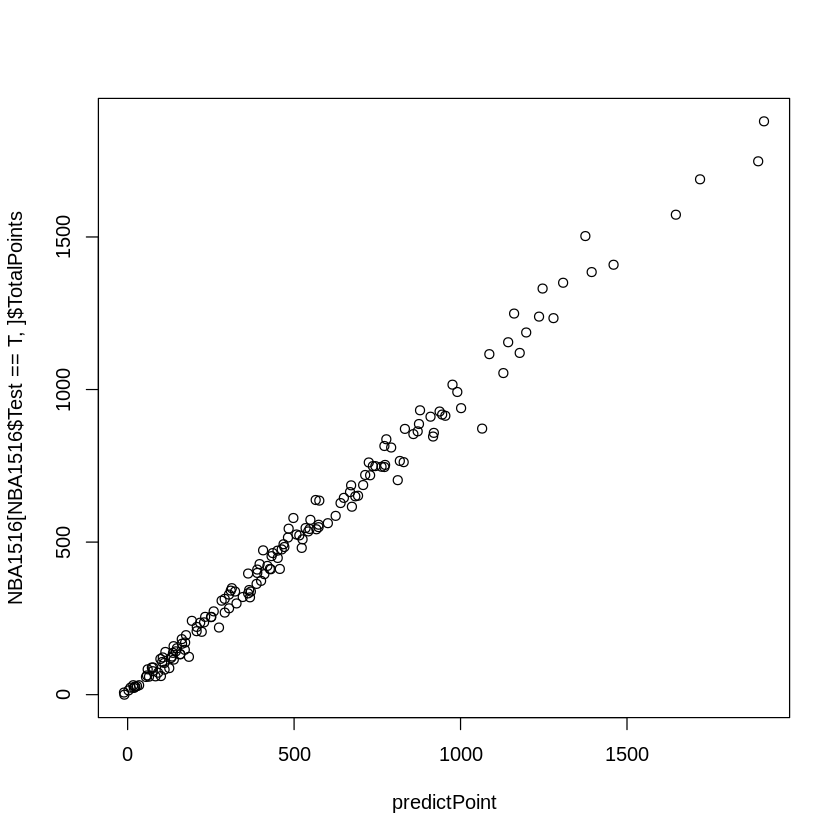

In [ ]:
predictPoint<-predict(finalModel_Both, #Test==T, test data
newdata = NBA1516[NBA1516$Test==T,])

cor(x=predictPoint,y=NBA1516[NBA1516$Test==T,]$TotalPoints) #相關係數

plot(x=predictPoint,y=NBA1516[NBA1516$Test==T,]$TotalPoints)

In [ ]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")
mydata$admit <- factor(mydata$admit) # 類別變項要轉為factor
mydata$rank <- factor(mydata$rank) # 類別變項要轉為factor
mydata$Test<-F #新增一個參數紀錄分組
mydata[sample(1:nrow(mydata),nrow(mydata)/3),"Test"]<-T #隨機取1/3當Test set
c(sum(mydata$Test==F),sum(mydata$Test==T)) # Training set : Test set學生數

[1] 267 133

In [ ]:
#修改一下factor的level: 改成Level 2為錄取,1為不錄取-->Level 2 要放正面答案
mydata$admit<-factor(mydata$admit,levels=c(0,1))

In [ ]:
# GRE:某考試成績, GPA:在校平均成績, rank:學校聲望
mylogit <- glm(admit ~ gre + gpa + rank,
         data = mydata[mydata$Test==F,], family = "binomial")
finalFit <- stepAIC(mylogit,direction = "both",trace=FALSE) # 雙向逐步選擇模型
summary(finalFit)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = mydata[mydata$Test == F, ])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.484  -0.903  -0.629   1.158   2.338  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -4.35281    1.42234   -3.06   0.0022 **
gre          0.00198    0.00136    1.46   0.1435   
gpa          0.87238    0.41606    2.10   0.0360 * 
rank2       -0.29169    0.37484   -0.78   0.4365   
rank3       -0.92284    0.40911   -2.26   0.0241 * 
rank4       -1.92408    0.61707   -3.12   0.0018 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 334.08  on 266  degrees of freedom
Residual deviance: 304.81  on 261  degrees of freedom
AIC: 316.8

Number of Fisher Scoring iterations: 4


In [ ]:
AdmitProb<-predict(finalFit, # 用Training set做的模型

newdata = mydata[mydata$Test==T,], #Test==T, test data
type="response") #結果為每個人被錄取的機率

In [ ]:
head(AdmitProb)

4     6    17    18    25    28 
0.098 0.373 0.205 0.089 0.447 0.121

In [ ]:
table(AdmitProb>0.5,mydata[mydata$Test==T,]$admit)#row,column

       
         0  1
  FALSE 86 35
  TRUE   5  7

In [ ]:
AdmitProb<-predict(finalFit,

newdata = mydata[mydata$Test==T,], #Test==T, test data
type="response") #結果為每個人被錄取的機率
AdmitAns<-factor(ifelse(AdmitProb>0.5,1,0),levels=c(0,1))
str(AdmitAns)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "names")= chr [1:133] "4" "6" "17" "18" ...


In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lava’, ‘prodlim’, ‘ipred’, ‘ModelMetrics’, ‘recipes’


Warning message in install.packages("caret"):
“installation of package ‘lava’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘prodlim’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘ipred’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘recipes’ had non-zero exit status”
Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”


In [ ]:
library(caret)  #計算參數的packages
sensitivity(AdmitAns,mydata[mydata$Test==T,]$admit,positive = "1")

ERROR: ignored

In [ ]:
specificity(AdmitAns,mydata[mydata$Test==T,]$admit,negative = "0")

ERROR: ignored

In [ ]:
posPredValue(AdmitAns,mydata[mydata$Test==T,]$admit,posttive = "1")

ERROR: ignored

In [ ]:
negPredValue(AdmitAns,mydata[mydata$Test==T,]$admit,negative = "0")

ERROR: ignored

In [ ]:
if (!require('rpart')){install.packages("rpart"); library(rpart)}


In [ ]:
DT<-rpart(Position~Blocks+TotalRebounds+ThreesMade+Assists+Steals,
    data=NBA1516[NBA1516$Test==F,]) #訓練組 Training set
#控球後衛(PG)、得分後衛(SG)、小前鋒(SF)、大前鋒(PF)和中鋒(C)
DT

ERROR: ignored

In [ ]:
if (!require('rpart.plot')){
install.packages("rpart.plot");
library(rpart.plot)
}
